## 1. Measuring information theory quantities for discrete time series

This notebook is the first in a series of notebooks that aims in demonstrate how to use the "InfoPy" packege to compute information theory quantities such as entropy, mutual information and transfer entropy. We will begin by using the methods to compute IT quatities for discrete variables (or time series).

The series of notebooks are divided as:

1. Application of "InfoPy" to discrete variables;
2. Application of "InfoPy" to continuous variables using kernel density estimation methods;
3. Application of "InfoPy" to continuous variables using KSG estimator (still not available);

In [3]:
##########################################################################
# Importing packages
##########################################################################
import numpy             as np 
import matplotlib.pyplot as plt

##########################################################################
# Plots configuration
##########################################################################
plt.xkcd()

### A brief review on information theory

Before we proper get hands-on on using "InfoPy" let's review the basic concepts of information theory (IT), namely the entropy, mutual information, and transfer entropy.

#### Entropy

In a straightfoward definition the entropy $H(X)$ quantifies the amount of uncertainty associated to a given random variable $X$, and it is the average of another quantity called information content $h(x_i)$. Note that $h(x_i)$ is a measure of uncertainty (or surprisal as we will see further) associated to a single outcome of $X$, here denoted by $x_i$. 

But, how can we properly define $h(x_i)$? Intuitivelly, one could associate the amount of unecertainty of an outcome $x_i$ to the inverse of its probability $p(x_i)$, i.e., the rare the event is the more information one gets by observing it (or more surprised the observer gets, which is why it is also called surprisal). However, this definition carries a few problems, for example, for $p(x_i)\rightarrow 0$, the surprisal would go toward infinity $h(x_i)\rightarrow \infty$. In order to satisfy the following properties:

1. $H(X)$ is continuous;
2. $H(X)$ increases monotonically with the number of outcomes $n$: $\{p(x_1), \dots, p(x_n) \}$;
3. $H(X)$ is additive $H(XY) = H(X)+H(Y)$.

We define the surprisal as:

$h(x_i) = \log_{b}\left(\frac{1}{p(x_i)}\right)$,

Consequently, the entropy of $X$ in given by:

$H(X) = -\sum_{i} p(x_i)\log_{b} p(x_i) $.

Using this definition the maximum amount of uncertainty of a random variable occurs when all its outcomes are equaly probable (picture yourself trying to guess which outcome will result from tossing a fair dice of $1000$ faces let's say, hard isn't it? But let's say that the dice is biased towards even numbers greather than $500$ it starts to get easier to guess!). For $n$ equaly probable outcomes, we have: $p(x_1) = ... = p(x_n) = 1/n$, therefore:

$H(X) = \log_{b}(n)$.

It is easy to see from the equation above that $H(X)$ satsfies conditions (1), and (2). On the equations above if the base of the logarithm $b=2$, the entropy is defined in __bits__ (for $b = e$, in __nats__). Let's apply exponential of $2$ on both sides of the equation above:

$n = 2^{H(X)}$,

for $H(X) = 1$ bit, we get $n = 2$, therefore $1$ bit is the amount of information necessary to choose between two equaly probable outcomes.

#### Joint entropy



The entropy can be computed for two or more random variables, in this case it is computed using the joint probability distribution of those random variables. For example for two variables $X$, and $Y$, the joint entropy is:

$H(X,Y) = -\sum_{i} p(x_i, y_i)\log_{b} p(x_i, y_i) $.

#### Conditional entropy

Another relevant entropy we should define is the conditional entropy:

$H(X|Y) = -\sum_{i} p(x_i|y_i)\log_{b} p(x_i|y_i) $.

where $p(x_i|y_i)$ denotes the conditional probability. 

This quantity can be read as the uncertainty I have about the variable $X$ after observing the variable $Y$ or the uncertainty reduction concerning $X$ given my knowledge of $Y$. For instance, if I'm given the task of receiving book donations for my city local library and to place then in the shelf  corresponding to its category but without knowing which book I'm receiving (this totally could happen). It is very hard to say if the book is categorized as "scifi", "fantasy", or "magical reaslism". But since I know everyone who regularly goes to the library and their reading taste I can try to guess to which category the book belongs to, for instance João is an avid reader of Tolkien so the book he is donating might be a fantasy one, Pedro's favorite writer is Machado de Assis so perhaps the book he is donating can be put on the "realism" shelf. In summary, knowing who is delivering the book ($Y$) have descreased the uncertainty of which category the book might belong too ($X$).

The single, joint and conditional entropies relate to each other via:

$H(X,Y) = H(X) + H(X|Y) = H(Y) + H(Y|X)$

Knowing the definition of the entropies we have discussed allow us to defined the next relevant IT measure called "mutual information".

#### Mutual information

The mutual information, as the name suggests, is the amount of information that is shared between two variables $X$, and $Y$, and is defined as follows:

$MI(X,Y) = H(X) - H(X|Y) = H(Y) - H(Y|X)$

The expression for the $MI$ can be rewritten using the relation between entropies $H(X,Y) = H(X) + H(X|Y)$:

$MI(X,Y) = H(X) + H(Y) - H(X,Y)$

The amount of information shared between the variables is then the total information provaded by them alone minus the information obtained by observing them togheter.

The mutual information can also be interpreted as a non-linear correlation between $X$, and $Y$ where $X$, and $Y$ ara uncorrelated if $MI(X,Y)=0$.

For many variables the equation can be generallized as:

$MI(X_{1},\dots, X_{n}) = \sum_{i}H(X_{i})  - H(X_{1},\dots, X_{n})$

#### Conditional mutual information

The concept of conditional mutual information can be defined by simply conditioning the entropies in the equation defining the mutual information:

$MI(X,Y|Z) = H(X|Z) - H(X|Y,Z)$

But how to interpret this? In a straightfoward definition the conditional mutual information tells us if the shared information between $X$, and $Y$ ($MI(X,Y)$) really exists or if we are actually measuring correlations between $X$, and $Y$ due to the fact that they are both dependent to a third variable $Z$. Thus if $MI(X,Y|Z) = 0$ we say that conditioned in $Z$, $X$ is independent of $Y$.

To illustrate the concept, I'll borrow a nice example from the book "An Introduction to Transfer Entropy", by Bossmaier and colleagues: 

`Imagine that we start to see snakes and an increasing number of cats in the garden. Now cats do kill snakes, and we might think that the cats are there just for that purpose. However, killing a snake is just a bit risky for a cat. But we might find that the snakes and cats appear because of a third factor—an increase in the number of mice. If we condition on the mice population, then we find there is no relationship between cats and snakes in the garden; they are conditionally independent.`

#### Transfer entropy (TE)

Finally, we will define the transfer entropy. Transfer entropy was first defined by T. Schreiber in his paper "Measuring information transfer", and it calculates the amount of information sent by a varIable $Y$ to another variable $X$, and can be written as the following conditional mutual information:

$TE_{Y\rightarrow X}(t) = MI(X_t,Y_{t-1}|X_{t-1}) = H(X_t|X_{t-1}) - H(X_t|X_{t-1},Y_{t-1})$

This equation can be read as: the amount of information that is present in $X$ at a given time, that already was in a past time of $Y$ but not in $X$.

Using the definition of the conditional mutual information you can also interpret this as the dependece between $X$ and the past of $Y$ that is not due to the past of $X$ itself. This also can be related to the notion of causality defined by Wiener: A random variable $X$ causes another variable $Y$, if the past of $X$ has information that increases the predctability of future values of $Y$. In fact, for random gaussian variables transfer entropy is equivalent to the so called Wiener-Granger Causality. 

### Estimating IT quantities

The major problem in estimating IT quantities is that we have to estimate the probability distributions of the data in order to compute them, that sometimes requires a huge amount of data. However, there are a lot of "estimators" to compute those quantities. InfoPy so far has three estimators, for discrete binary variables we use the "naive" or "plug-in" estimator, where we simply count the number of times a given symbol appears to compute the probilite as:

$p_{\rm naive} = \frac{\# \text{Number of occurences of symbol}}{\# \text{Total number of symbols}}$

So, if we want to compute the entropy of a binary variable with length $N$, we first count the number of $0$s, and $1$s, then we compute the probability of a zero, and of an one, and "plug" it in the entropy definition:

$p_{\rm naive}(0) = \frac{\# 0}{N}$,
$p_{\rm naive}(1) = \frac{\# 1}{N}$.

Then, 

$H = -p_{\rm naive}(0)\log_{2}p_{\rm naive}(0) - p_{\rm naive}(1)\log_{2}p_{\rm naive}(1)$.

Of course if we want to compute mutual information we have to also compute the joint probability of the symbols, for instance, between two variables we have to count the probability of $2^2 = 4$ different symbols: $00$, $01$, $10$, $11$, for $n$ variable we have $2^{n}$ symbols. It is easy to see that for continuous variables, this task becomes almost impossible because we have a multitude of symbols, therefore we need other estimators. In InfoPy we use the kernel density estimator (KDE) and the Kraskov-Stögbauer-Grassberger (KSG) estimator for that, but this is subject for the other notebooks, for now let's start the examples for discrete variables.

### Examples using infoPy

Before starting we have to import the module <b>discrete</b> from infoPy, this can be done as follows:

In [1]:
import infoPy.discrete as it

### Ex. 1 - Entropy of binary time series

For this example let's generate $20$ binary time series, each one with different probability p(1), and we will compute the entropy of each.

Which one will have the biggest entropy?

In [4]:
# Function to generate the binary time series
def generate_series(p_1 = 0, size = 1000):
    r = np.random.rand(size)
    return (r > p_1).astype(int)

We can compute the entropy with the method <b>BinEntropy</b>:

In [7]:
# Probabilities of p(1)
probabilities = np.linspace(0, 1, 20)
# Computing entropy
H = [it.BinEntropy(generate_series(p_1 = p, size = 5000)) for p in probabilities]

Now let's plot the result:

Text(0.5, 0, 'probabilities')

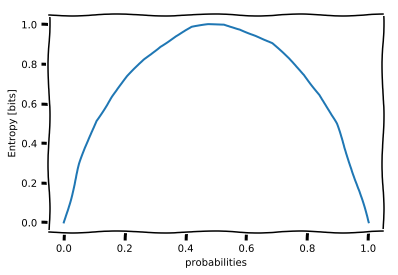

In [13]:
plt.figure(figsize=(6,4))
plt.plot(probabilities, H)
plt.ylabel('Entropy [bits]')
plt.xlabel('probabilities')

As expected, the entropy is maximum for $p(1) = p(0) = 1/2$.

### Ex. 2 - Mutual information to retrive connection of a network of celular automata

In this example we will create a network of celular automata, where we know the connections among the elements beforehand, and we will try to retrieve the connections by computing the pairwise MI information between each element. This type of techinique is very common, for instance, in neuroscience where if we want to retrieve the connections between cortical areas we compute correlation, MI, Granger causality, or TE between signals recorded from the brain.

Each automata in the network can have two different states: $S_0 = 0$, or $S_1 = 1$, and they can trastition between states at each time of the simulation. 

The network will have $N = 100$ elements, that can be connected to each other with a probability $p = 0.01$. Therefore, the adjacency matrix ($A$) of the network will be size $N\times N$. If there is a connections between the element $i$, and $j$ of the network, the element of the matrix corresponding to this connections will be $A_{i,j} = G$, otherwise it will be $A_{i,j} = 0$. The value $G$ is the strength of the connections from $i$ to $j$, i.e., how much the probabily of $j$ transitioning from $S_0$ to $S_1$ increases if at the last time step the state of $i$ was $S_1$.

The probability of a given element transition from $S_0$, to $S_1$ will depend on all connections it receives from the network and can be expressed mathematically as:

$P(0\rightarrow 1) = I + \sum_{j=1, j \neq i}^{N}A_{i,j}S_{j}(t)$

In the expression above $I$ is the input drive, and here $I = 0.01$, and $G = 0.3$.

Now let's implement the network.

In [25]:
# Creates the adjacency matrix
def NetworkGenerator(N, p, G):

    A = np.zeros([N,N])

    for n in range(0, N):
        for m in range(0, N):
            if np.random.rand() <= p:
                A[n, m] = G
    return A

# Simulate the network
def BinomialNeuronNetwork(Sprevious, A, InProb):
    N = len(A)
    Prob_of_firing = np.zeros(N)
    Snext = np.zeros(len(Sprevious))


    for n in range(0, N):

        InputWeights = A[:, n]
        Prob_of_firing[n] = InProb[n] + np.sum(InputWeights*Sprevious)

        if Prob_of_firing[n] < 0:
            Prob_of_firing[n] = 0
        if Prob_of_firing[n] > 1.0:
            Prob_of_firing = 1.0

        dice = np.random.rand()

        if dice <= Prob_of_firing[n]:
            Snext[n] = 1
        else:
            Snext[n] = 0

    return Snext

In [26]:
# Defining network parameters
N = 100
p = 0.01
G = 0.3
# Integration time
T  = 5000
# Initial condition
Sinit = np.zeros(N)
# Constant input on all neurons 
InProb  = 0.01
InProbs = InProb*np.ones([N, T])

In [27]:
# Generating the network
A = NetworkGenerator(N, p, G)

Now let's visualize the connections between each element:

Text(0.5, 1.0, 'Adjacency matrix $A$')

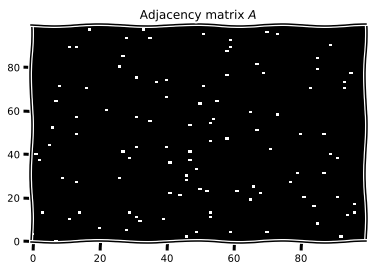

In [30]:
plt.imshow(A, aspect='auto', cmap='gray', origin='lower')
plt.title(r'Adjacency matrix $A$')

Next we have to simulate the network and generate the time series for each element.

In [31]:
# Initializing the raster and setting initial conditions
Raster      = np.zeros([N, T])
Raster[:,0] = Sinit

# Simulating the netwoek
for t in range(1, T):
    Raster[:, t] = BinomialNeuronNetwork(Raster[:,t-1], A, InProbs[:,t-1])

We can visualize the the serie of each element via an raster plot:

Text(0.5, 0, 'Time')

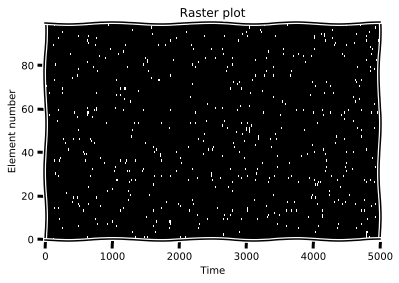

In [32]:
plt.imshow(Raster, aspect='auto', cmap='gray', origin='lower')
plt.title(r'Raster plot')
plt.ylabel('Element number')
plt.xlabel('Time')

We can finally compute the pairwise mutual information using the method <b>BinMutualInformation</b>:

In [ ]:
MI = np.zeros([100, 100])

for i in range(0, 100):
    for j in range(0, 100):
        if i == j:
            MI[i, j] = 0
        else:        
            MI[i, j] = it.BinMutualInformation(np.vstack( (Raster[i,:].astype(int), Raster[j,:].astype(int)) ) )